In [971]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [972]:
data=pd.read_csv('data.csv')

In [973]:
data=data.drop(columns=['id','Unnamed: 32'])

In [974]:
x=data.iloc[:,1:]
y=data['diagnosis']

In [975]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=5)

In [976]:
from sklearn.neighbors import KNeighborsClassifier

In [977]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [978]:
model.score(x_test,y_test)
y_predict=model.predict(x_test)

In [979]:
from sklearn.metrics import accuracy_score

In [980]:
estimator=[]
Accuracy_score=[]
def score(model,x_train,x_test,y_train,y_test):
    for i in range(1,51):
        model=KNeighborsClassifier(n_neighbors=i,algorithm='auto', leaf_size=30, 
             metric='minkowski', metric_params=None, 
             n_jobs=None, p=2, 
             weights='uniform')
        model.fit(x_train,y_train)
        y_predict=model.predict(x_test)
        acc_score=accuracy_score(y_predict,y_test)
        estimator.append(i)
        Accuracy_score.append(acc_score)
        

In [981]:
score(model,x_train,x_test,y_train,y_test)

In [982]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'AccuracyScore')

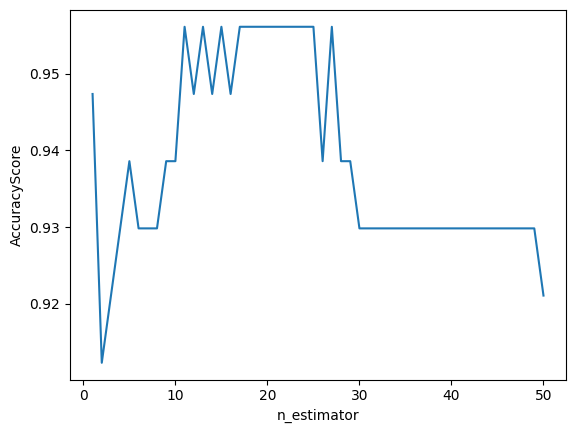

In [983]:
plt.plot(estimator,Accuracy_score)
plt.xlabel('n_estimator')
plt.ylabel('AccuracyScore')

In [984]:
from sklearn.model_selection import cross_val_score

In [985]:
cross_score=[]
n=[]
for i in range(1,51):
    n.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(knn,x,y,cv=15)
    cross_score.append(cv_score.mean())

In [986]:
MCE=[1-x for x in cross_score]

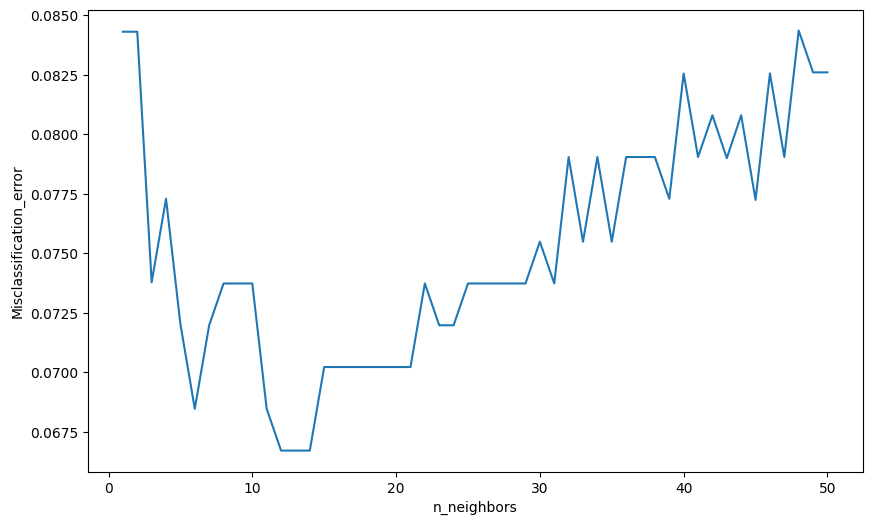

In [987]:
plt.figure(figsize = (10, 6))
plt.plot(n,MCE)
plt.xlabel('n_neighbors')
plt.ylabel('Misclassification_error')
plt.show()